**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

# The data
## **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix_df = pd.read_csv('netflix_data.csv')
display(netflix_df.head(), netflix_df.tail(), netflix_df.dtypes, netflix_df.shape)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,1,Dessert wizard Adriano Zumbo looks for the nex...,International TV
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,United Kingdom,"March 1, 2020",2019,90,This documentary delves into the mystique behi...,Documentaries


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
duration         int64
description     object
genre           object
dtype: object

(7787, 11)

# Data Cleaning and Validation

In [3]:
# Check for null values
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
duration           0
description        0
genre              0
dtype: int64

In [4]:
netflix_df[['director', 'cast', 'country']] = netflix_df[['director', 'cast', 'country']].fillna('NA')
netflix_df['date_added'].fillna(0, inplace = True)

In [99]:
# Check for duplicates
netflix_df[netflix_df.duplicated(keep=False)]

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,month_added


In [16]:
# Change date added to Netflix column to datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

In [24]:
netflix_df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

# Business Tasks

## Content Strategy and Acquisition: 
- Evaluating the prevalence of genres on Netflix to guide content diversification efforts.
- Analyzing genres that tend to appear on Netflix more quickly to inform timely content acquisition.
- Identifying top countries content from which tends to appear on Netflix more quickly to inform timely content acquisition.
- Identifying underrepresented countries for content production and acquisition opportunities.

### Which genres are most prevalent on Netflix?

In [26]:
genre_counts = netflix_df['genre'].value_counts()
genre_counts.head()

Dramas              1384
Comedies            1074
Documentaries        751
Action               721
International TV     690
Name: genre, dtype: int64

These figures suggest that Netflix has a strong focus on Dramas and Comedies, which could be due to their popularity among viewers or a strategic content acquisition approach by Netflix. This genre distribution also identifies opportunities to expand into underrepresented areas to differentiate the platform's offerings.

### Which genres tend to appear on Netflix more quickly than others?

In [220]:
# Calculate the number of years between release and being added to Netflix
netflix_df['years_to_netflix'] = netflix_df['date_added'].dt.year - netflix_df['release_year']

# Group by genre and calculate the average time to Netflix
average_years_to_netflix_by_genre = netflix_df.groupby('genre')['years_to_netflix'].mean().sort_values()
average_years_to_netflix_by_genre

genre
TV Sci                   0.000000
TV Action                0.621622
Sports Movies            1.000000
Romantic Movies          1.000000
Crime TV                 1.008130
TV Horror                1.100000
Docuseries               1.128866
TV Comedies              1.236364
Music                    1.647059
Anime Features           2.000000
LGBTQ Movies             2.000000
International TV         2.014493
Documentaries            2.062583
Reality TV               2.068627
TV Dramas                2.225806
Stand-Up                 2.237288
Kids                     2.389972
Romantic TV              2.392857
British TV               2.482759
Spanish-Language         3.000000
Uncategorized            3.196429
International Movies     3.578947
Independent Movies       3.600000
Horror Movies            3.659836
Anime Series             4.250000
Sci-Fi                   4.363636
Dramas                   4.791908
Thrillers                4.836735
Children                 4.972112
Comedies

The analysis of the time it takes for content to be added to Netflix after its release reveals that certain genres tend to appear on Netflix more quickly than others. For example, genres like "TV Sci", "TV Action", "Sports Movies" and "Romantic Movies" have the shortest average time from release to being available on Netflix, often within the same year. On the other hand, genres such as "Anime Features", "LGBTQ Movies" and "International TV" take on average two years to be added, indicating that Netflix may prioritize adding newer content in these categories as well to keep its library fresh and relevant. It is worth noting that Classical genres include more evergreen content that remains relevant over time.

### Content from which top countries tends to appear on Netflix more quickly?

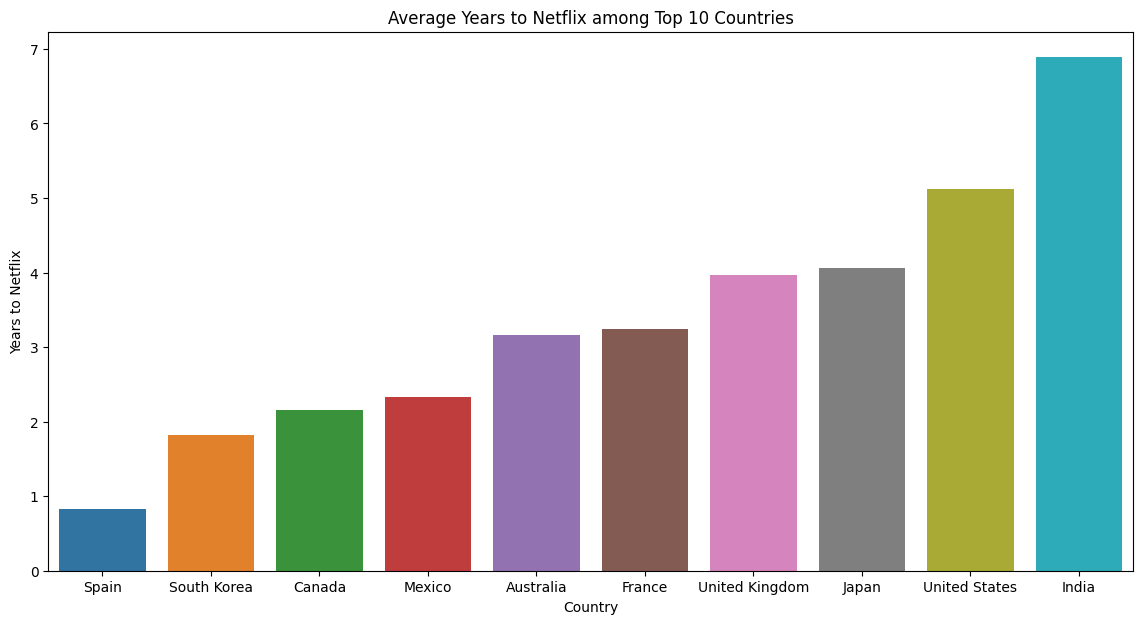

In [222]:
average_years_by_country = netflix_df.groupby('country')['years_to_netflix'].mean().sort_values().reset_index()
average_years_top_countries = average_years_by_country[average_years_by_country['country'].isin(top_countries)]

plt.figure(figsize=(14, 7))
sns.barplot(x='country', y='years_to_netflix', data=average_years_top_countries)
plt.title('Average Years to Netflix among Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Years to Netflix');

### Which countries are currently underrepresented in terms of content production on Netflix?

In [221]:
country_representation = netflix_df.groupby('country')['title'].count().reset_index(name='count').sort_values('count')

# Display the least represented countries
least_represented_countries = country_representation.head(10)
least_represented_countries

,country,count
81,Zimbabwe,1
50,Paraguay,1
44,Namibia,1
55,Puerto Rico,1
41,Mauritius,1
80,West Germany,1
36,Jordan,1
34,Jamaica,1
30,Iran,1
59,Senegal,1


The countries that are currently underrepresented have only one title available on the platform. This suggests that these countries have a minimal presence on Netflix, which could be due to various factors such as limited local content production, lesser focus from Netflix or smaller markets for streaming services. These countries may represent opportunities for Netflix to diversify its content offerings and expand its global reach by investing in local productions or acquiring content from these regions.

## Content Release and Scheduling:
- Examining trends in content release dates to optimize release schedules.
- Investigating patterns that suggest the best times to release certain types of content.

### What are the trends in content release dates on Netflix?

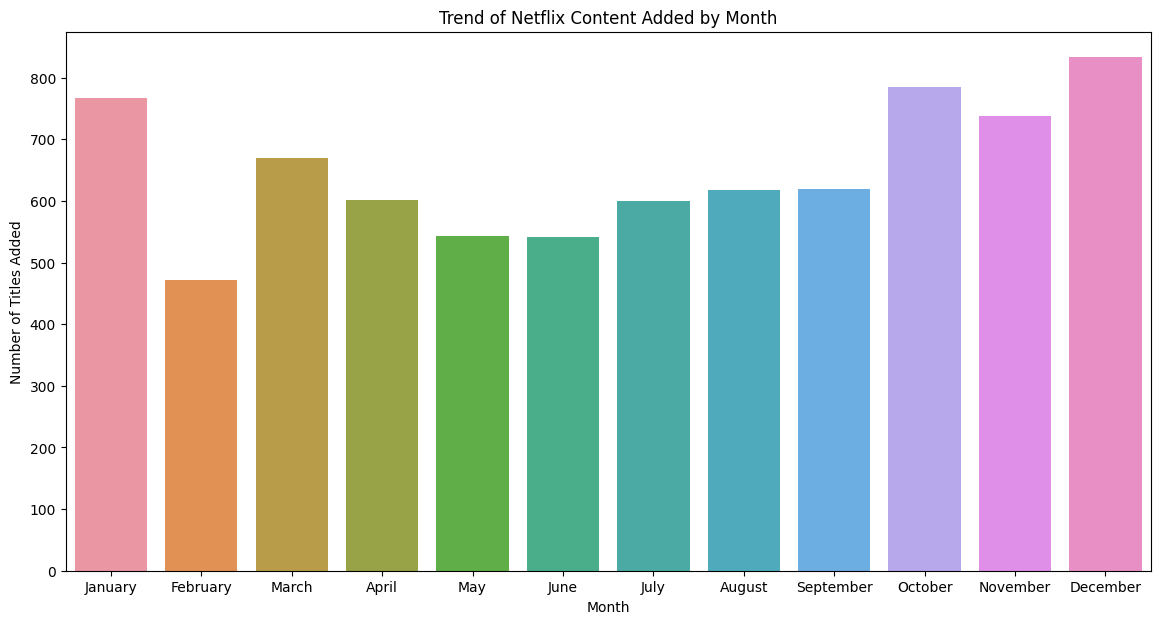

In [134]:
netflix_df['month_added'] = netflix_df['date_added'].dt.month_name()
monthly_content_trend = netflix_df.groupby('month_added').size().reset_index(name='count')

# Sort the months in calendar order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_content_trend['month_added'] = pd.Categorical(monthly_content_trend['month_added'], categories=months_order, ordered=True)
monthly_content_trend = monthly_content_trend.sort_values('month_added')

# Plot the trend of content added by month
plt.figure(figsize=(14, 7))
sns.barplot(x='month_added', y='count', data=monthly_content_trend)
plt.title('Trend of Netflix Content Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added');

The data shows a significant increase in the number of titles added during December, which suggests that Netflix is capitalizing on the holiday season when viewers have more free time. Conversely, there are months with far fewer releases, like February, which indicates a strategic decision to either focus on quality over quantity or plan for content releases during peak viewing times.

### Can we identify any patterns that suggest the best times to release certain types of content?

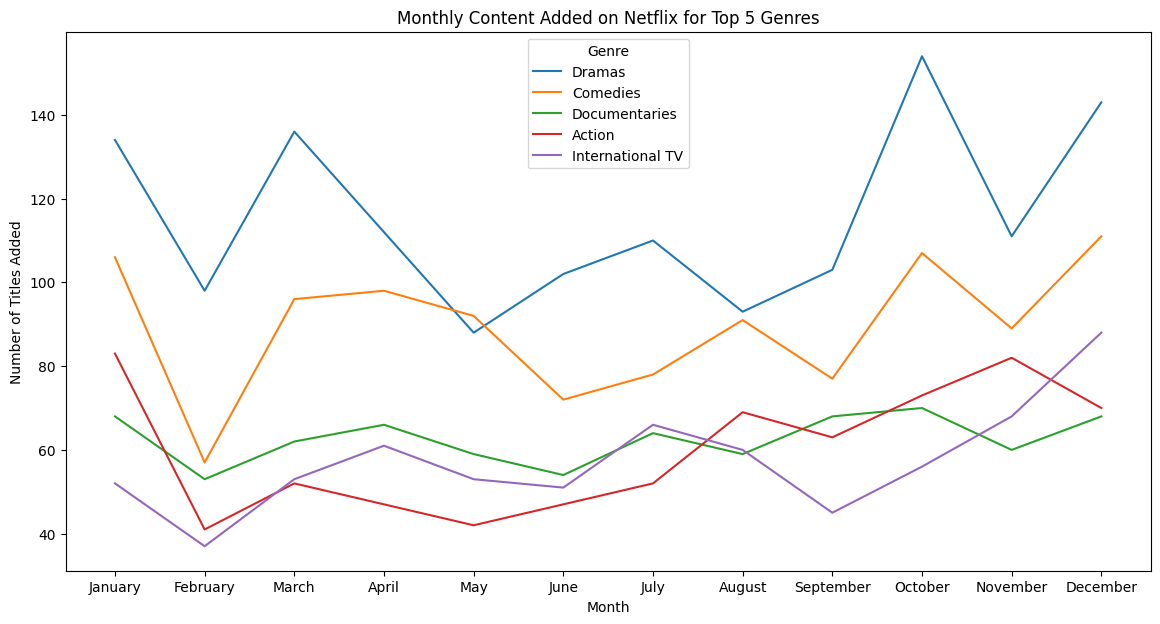

In [132]:
monthly_genre_trend = netflix_df.groupby(['month_added', 'genre']).size().reset_index(name='count')

top_genres = ['Dramas', 'Comedies', 'Documentaries', 'Action', 'International TV']

# Sort the months in calendar order for each genre
category_order = pd.CategoricalDtype(categories=months_order, ordered=True)
monthly_genre_trend['month_added'] = monthly_genre_trend['month_added'].astype(category_order)

# Filter the monthly_genre_trend dataframe for the top genres
monthly_top_genre_trend = monthly_genre_trend[monthly_genre_trend['genre'].isin(top_genres)]

# Create line plots for each of the top 5 genres
plt.figure(figsize=(14, 7))
for genre in top_genres:
    genre_data = monthly_top_genre_trend[monthly_top_genre_trend['genre'] == genre]
    sns.lineplot(data=genre_data, x='month_added', y='count', label=genre)

plt.title('Monthly Content Added on Netflix for Top 5 Genres')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.legend(title='Genre');

October as the lead-up to the holiday season and colder weather may encourage viewers to engage with more serious and narrative-driven content, which includes Dramas and Documentaries. Dramas that have thriller or suspense elements could be particularly appealing around Halloween, as they fit the mood of the season without being strictly horror. December is a festive month with many holidays, people often seek light-hearted, feel-good content like Comedies to enjoy with family and friends and releasing International content can resonate with subscribers looking to explore global traditions and stories. The Action genre appears to have a higher count of new titles added in January, which might indicate a strategic choice to release action-packed content at the beginning of the year, possibly to attract viewers looking for new and exciting content after the holiday season. 

## Regional Content Popularity:
- Exploring specific genres that are more popular in certain countries to target regional preferences.

### Are there specific genres that are more popular in certain countries represented in the dataset?

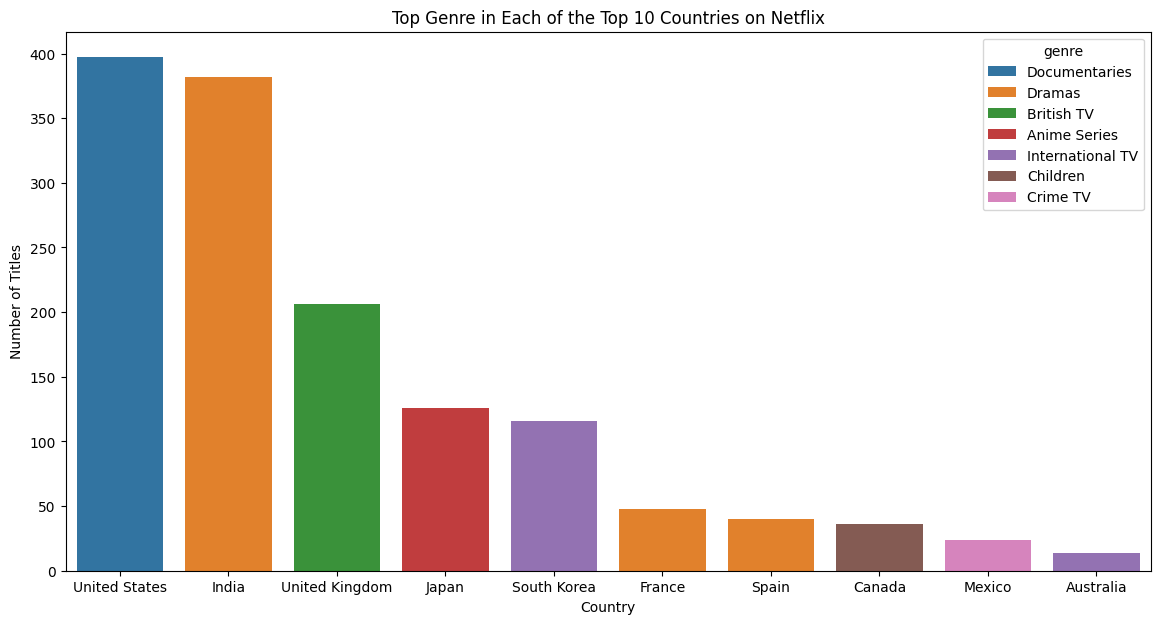

In [137]:
top_genres_by_country = netflix_df.groupby(['country', 'genre'])['title'].count().reset_index(name='count')
top_countries = top_genres_by_country[top_genres_by_country['country'] != 'NA'].groupby('country')['count'].sum().nlargest(10).index

# Filter the original group to only include the top 10 countries and get the top genre for each
top_genre_per_country = top_genres_by_country[top_genres_by_country['country'].isin(top_countries)]

# Sort the genres within each country by count and take the top one
top_genre_per_country = top_genre_per_country.sort_values('count', ascending=False).groupby('country').head(1)

# Create a bar plot to visualize the top 10 countries and their top genres
plt.figure(figsize=(14, 7))
sns.barplot(x='country', y='count', hue='genre', data=top_genre_per_country, dodge=False)
plt.title('Top Genre in Each of the Top 10 Countries on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles');

Notably, Dramas are the most common top genre, appearing as the favorite in three of the ten countries listed.

## Content Analysis and Catalog Optimization:
- Assessing the distribution of show types across different countries to tailor content offerings.
- Studying the change in the number of shows added to Netflix over the years to understand growth trends.

### What is the distribution of show types across different countries?

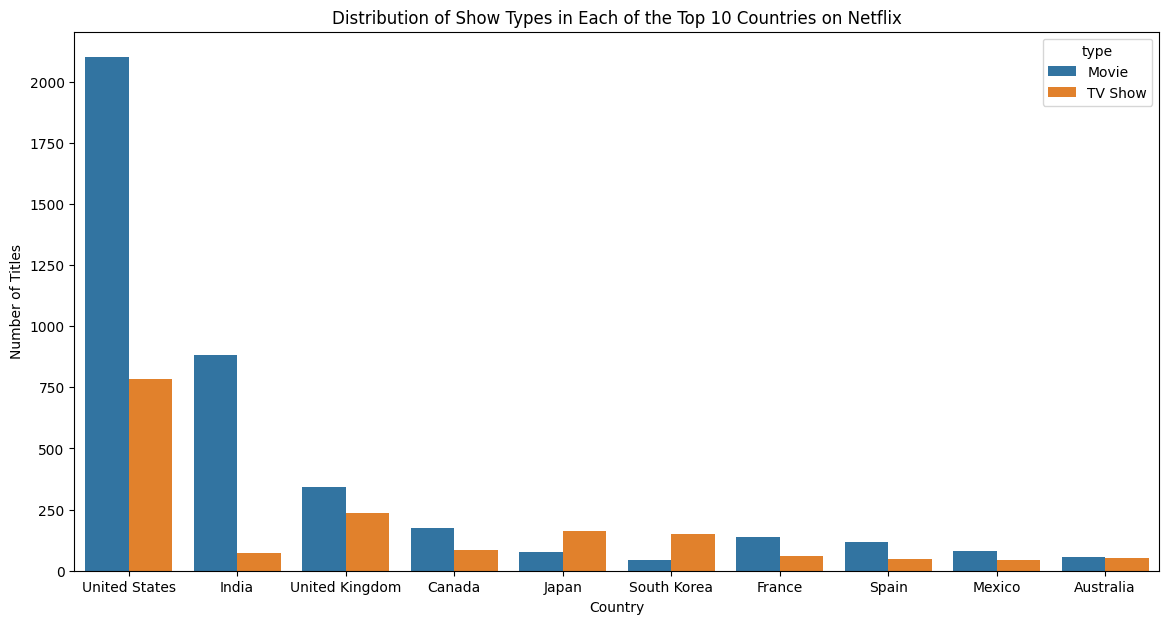

In [149]:
type_distribution_by_country = netflix_df.groupby(['country', 'type'])['title'].count().reset_index(name='count')

# Filter the original group to only include the top 10 countries
type_distribution_top_countries = (
    type_distribution_by_country[type_distribution_by_country['country'].isin(top_countries)]
    .sort_values('count', ascending=False)
)

# Create a bar plot for the distribution of show types in the top 10 countries
plt.figure(figsize=(14, 7))
sns.barplot(x='country', y='count', hue='type', data=type_distribution_top_countries)
plt.title('Distribution of Show Types in Each of the Top 10 Countries on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles');

Australia has the most balanced distribution. Japan and South Korea have more TV shows than movies. Overall, movies are generally more prevalent than TV shows, with India being the most movie-centric among these countries.

### How has the number of shows added to Netflix changed over the years?

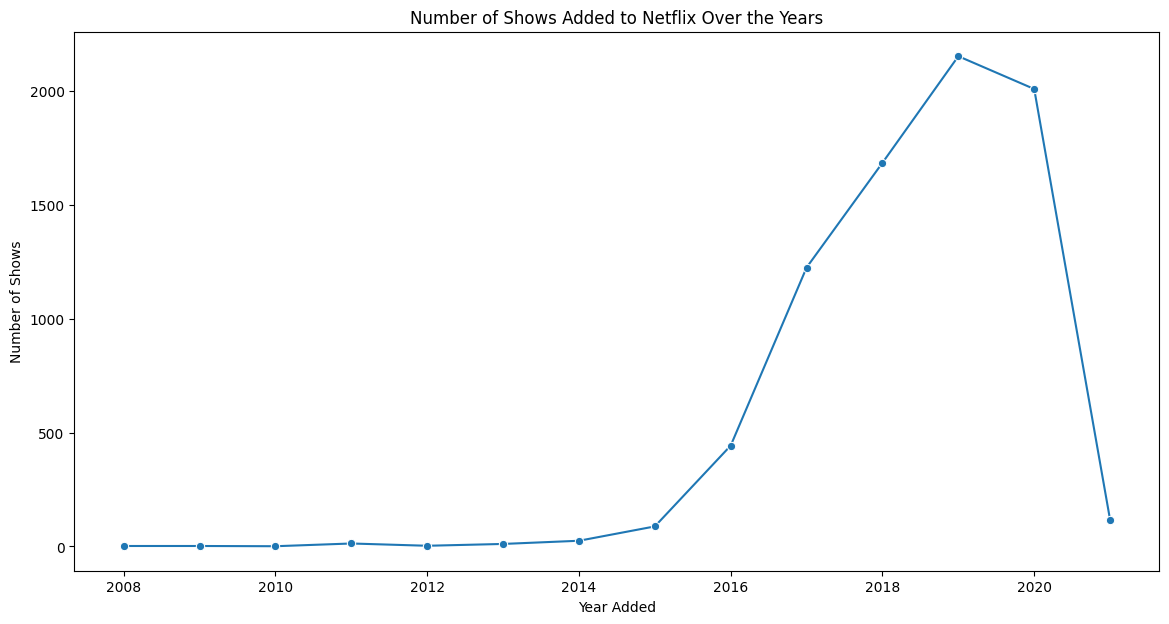

In [179]:
netflix_df['year_added'] = netflix_df['date_added'].dt.year

# Group by 'year_added', count the number of shows added each year and drop possible outliers
shows_per_year = netflix_df.groupby('year_added')['title'].count().reset_index(name='count').sort_values('year_added')
shows_per_year = shows_per_year[shows_per_year['year_added'] != 1970]

# Create a line plot for the number of shows added to Netflix over the years
plt.figure(figsize=(14, 7))
sns.lineplot(x='year_added', y='count', data=shows_per_year, marker='o')
plt.title('Number of Shows Added to Netflix Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Shows');

The data indicates that the number of shows added to Netflix has seen a significant increase over the years, starting with just a few titles in the early years and experiencing a substantial rise from 2015 onwards. The peak of content addition occurred in 2019, followed by a slight decrease in 2020. Notably, there is a sharp drop in 2021, which may be due to incomplete data for that year or other external factors affecting content acquisition and production. Overall, the trend shows aggressive content expansion, especially in the latter half of the 2010s.

## Content Duration and Format:
- Determining the average duration of movies and TV shows to align content with viewer preferences.

### What is the average duration of movies and TV shows on Netflix?

In [181]:
average_durations = netflix_df.groupby('type')['duration'].mean().reset_index(name='average_duration')
average_durations

,type,average_duration
0,Movie,99.307978
1,TV Show,1.775934


The analysis of the Netflix dataset reveals that the average duration of movies on the platform is approximately 99.31 minutes, which aligns with the typical length of films. On the other hand, TV shows have an average duration of about 1.78 minutes per episode, which seems unusually low and may indicate a data inconsistency or that the duration for TV shows is not measured in minutes but perhaps in seasons or episodes. It's important to verify the data for TV shows to ensure accurate interpretation of the average duration.

## Creative Talent and Partnerships:
- Highlighting the top 10 directors featured in Netflix titles to foster relationships with key creative talent.

### Who are the top 10 directors featured in Netflix titles?

In [219]:
# Filter out rows with NA values in 'director', 'genre', or 'country' columns before exploding
cleaned_df = netflix_df[~netflix_df[['director', 'genre', 'country']].isin(['NA']).any(axis=1)]

# Explode the DataFrame on 'director', 'genre', and 'country'
cleaned_df = cleaned_df.assign(director=cleaned_df['director'].str.split(', ')).explode('director')
cleaned_df = cleaned_df.assign(genre=cleaned_df['genre'].str.split(', ')).explode('genre')
cleaned_df = cleaned_df.assign(country=cleaned_df['country'].str.split(', ')).explode('country')

# Group by director and count the number of titles for each director
director_counts = cleaned_df.groupby('director').size().sort_values(ascending=False).head(10)

# For each top director, find the most common genre and country
common_genre_country = cleaned_df[cleaned_df['director'].isin(director_counts.index)].groupby('director').agg(
    common_genre=('genre', lambda x: x.mode()[0]),
    common_country=('country', lambda x: x.mode()[0])
)

# Combine the counts with the common genre and country
result = pd.concat([director_counts.rename('title_count'), common_genre_country], axis=1).reset_index()
result

,director,title_count,common_genre,common_country
0,Jan Suter,21,Stand-Up,Mexico
1,Raúl Campos,19,Stand-Up,Mexico
2,Marcus Raboy,15,Stand-Up,United States
3,Jay Karas,15,Stand-Up,United States
4,Cathy Garcia-Molina,13,Comedies,Philippines
5,Martin Scorsese,12,Classic Movies,United States
6,Jay Chapman,12,Stand-Up,United States
7,Youssef Chahine,12,Classic Movies,Egypt
8,Steven Spielberg,10,Action,United States
9,David Dhawan,9,Comedies,India


The top ten directors featured in Netflix titles predominantly work in the Stand-Up genre, with Jan Suter, Raúl Campos, Marcus Raboy and Jay Karas leading the count, all hailing from Mexico and the United States. Cathy Garcia-Molina, known for Comedies, represents the Philippines. Martin Scorsese, a renowned director from the United States, is most associated with Classic Movies on Netflix. These findings highlight a strong presence of Stand-Up content on Netflix, with a mix of comedic and classic films, showcasing a diverse array of directors from different countries contributing to the platform's rich content library.